In [1]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

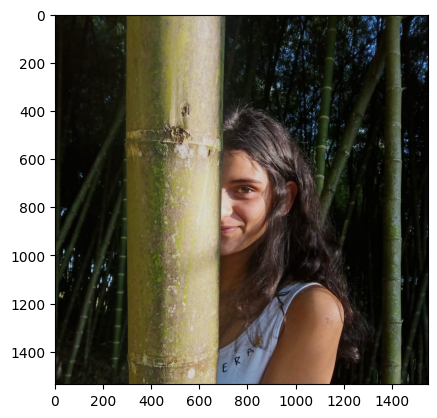

In [67]:
img=cv.imread('Sunnylady.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

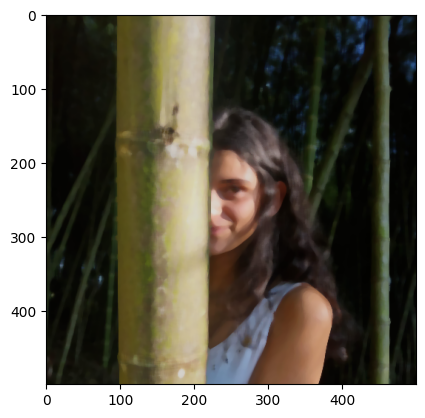

In [68]:
imgrez=cv.resize(img,dsize=(500,500))
imgrez= cv.medianBlur(imgrez, 7)
plt.imshow(cv.cvtColor(imgrez, cv.COLOR_BGR2RGB))

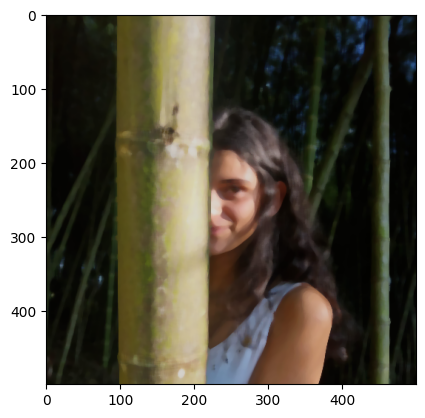

In [69]:
imgrez=cv.resize(img,dsize=(500,500))
imgrez= cv.medianBlur(imgrez, 7)
plt.imshow(cv.cvtColor(imgrez, cv.COLOR_BGR2RGB))

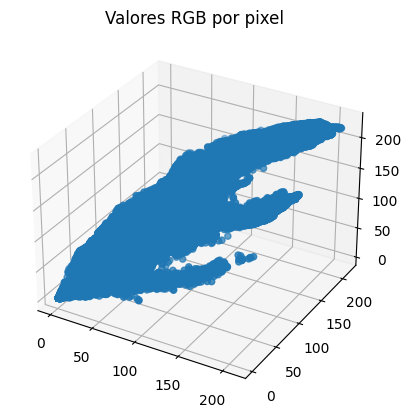

In [70]:
eje=plt.axes(projection="3d")
eje.scatter3D(imgrez[:,:,0],imgrez[:,:,1],imgrez[:,:,2])
eje.set_title('Valores RGB por pixel')
plt.show()

In [71]:
imgrez.shape

(500, 500, 3)

In [72]:
PixF=imgrez.reshape((-1,3))
PixF=np.float32(PixF)

In [73]:
anchobanda= estimate_bandwidth(PixF, quantile=.06, n_samples=20000)
anchobanda

18.246710290937216

In [74]:
Means= MeanShift(bandwidth=anchobanda, bin_seeding=True)
Means.fit(PixF)

MeanShift(bandwidth=18.246710290937216, bin_seeding=True)

In [75]:
grupos=set(Means.labels_)
etiquetas=Means.labels_
print(etiquetas)

[0 0 0 ... 0 0 0]


In [76]:
Clusters=Means.predict(PixF)
Clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
Means.cluster_centers_

array([[  6.362397,  11.599476,  10.850765],
       [ 32.35168 ,  76.75297 ,  83.56546 ],
       [160.72879 , 190.85881 , 203.78285 ],
       [ 54.673206,  78.580154, 121.88677 ],
       [ 89.5725  , 128.47485 , 142.37132 ],
       [114.92155 , 144.95663 , 195.41278 ],
       [ 63.32746 , 103.06387 , 110.37702 ],
       [100.79465 , 119.15621 , 104.12813 ],
       [143.31085 , 120.82152 , 109.9643  ],
       [ 94.10156 , 119.7913  , 170.26115 ],
       [119.518295,  72.20122 ,  39.689026],
       [159.53847 , 102.84615 ,  63.153847]], dtype=float32)

In [78]:
ClusterInt=np.uint8(Means.cluster_centers_)
ClusterInt

array([[  6,  11,  10],
       [ 32,  76,  83],
       [160, 190, 203],
       [ 54,  78, 121],
       [ 89, 128, 142],
       [114, 144, 195],
       [ 63, 103, 110],
       [100, 119, 104],
       [143, 120, 109],
       [ 94, 119, 170],
       [119,  72,  39],
       [159, 102,  63]], dtype=uint8)

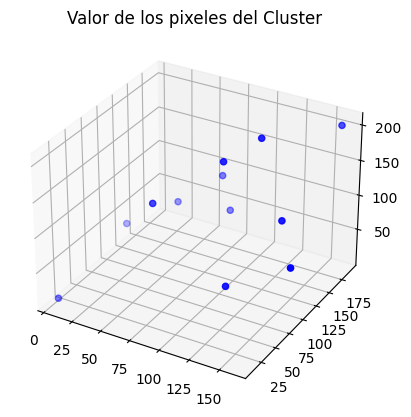

In [79]:
Agrup= plt.axes(projection="3d")
Agrup.set_title('Valor de los pixeles del Cluster')
Agrup.scatter3D(ClusterInt[:,0],ClusterInt[:,1],ClusterInt[:,2],color='blue')
plt.show()

In [80]:
resultado=np.zeros(PixF.shape, dtype=np.uint8)
for i in np.unique(etiquetas):
    resultado[etiquetas==i,:]=ClusterInt[i,:]
resultado=resultado.reshape(imgrez.shape)

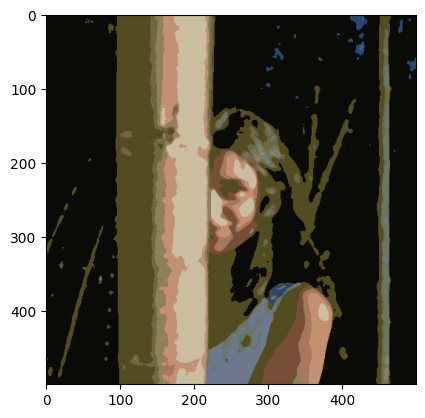

In [81]:
plt.imshow(cv.cvtColor(resultado, cv.COLOR_BGR2RGB))
plt.show()

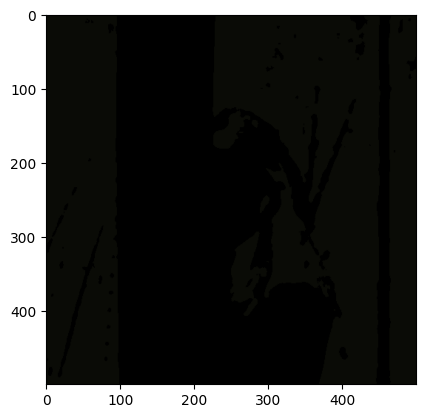

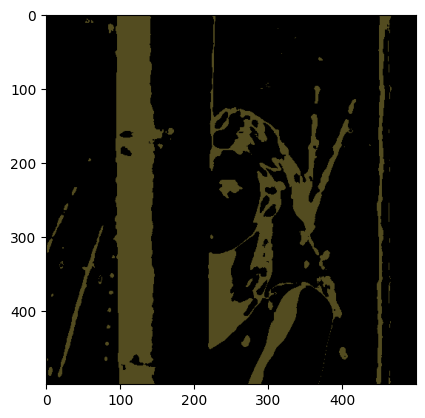

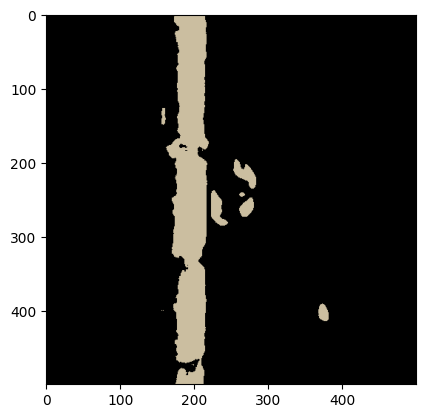

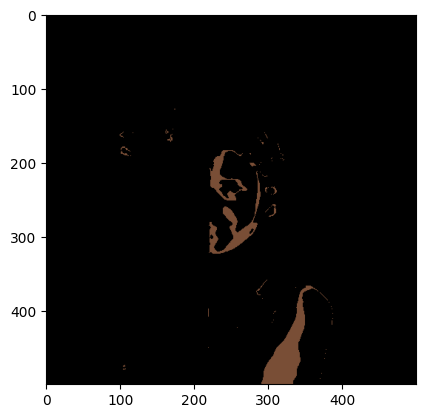

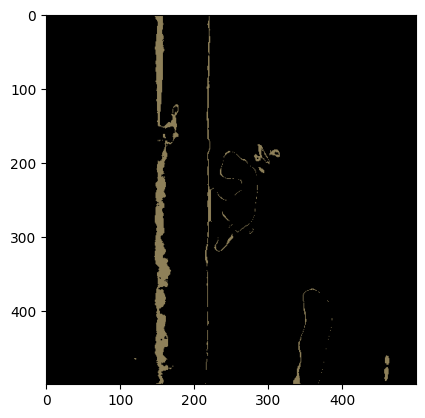

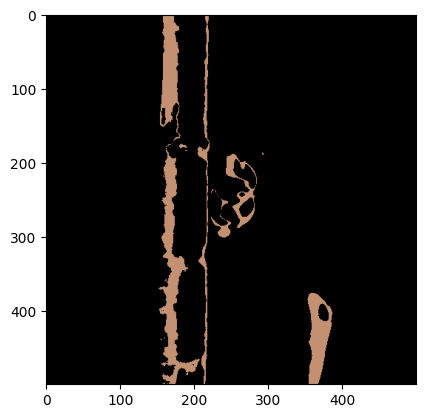

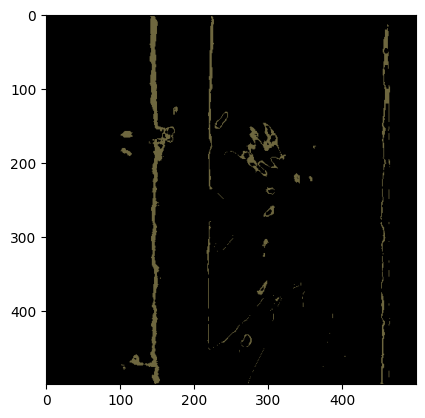

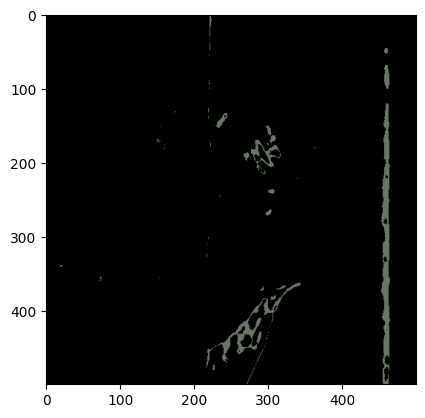

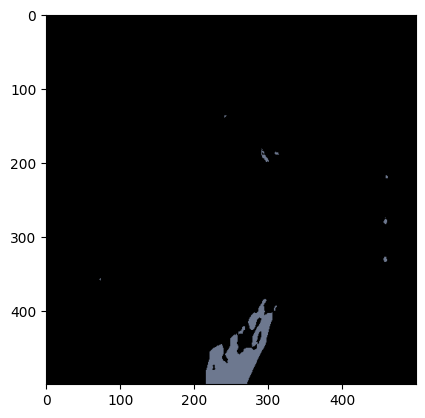

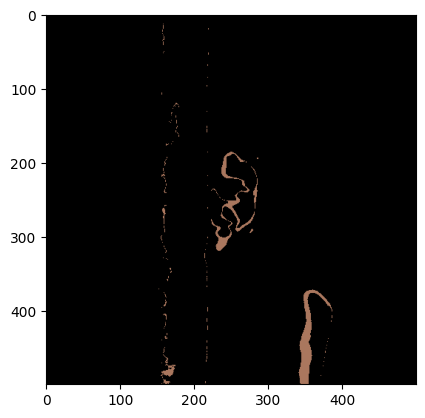

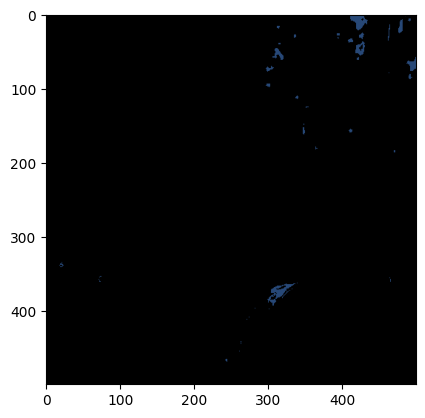

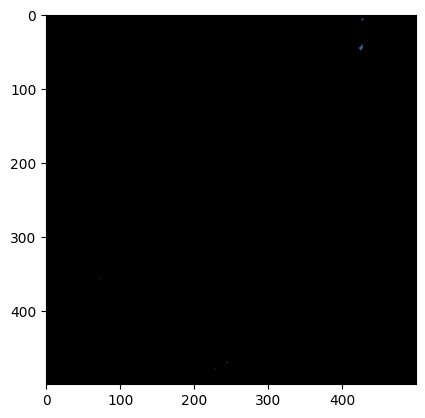

In [87]:
for i in np.unique(etiquetas):
    resultado2=np.zeros(PixF.shape,dtype=np.uint8)
    resultado2[etiquetas==i,:]=ClusterInt[i,:]  
    plt.imshow(cv.cvtColor(resultado2.reshape(imgrez.shape), cv.COLOR_BGR2RGB))
    plt.show()